In [1]:
### Functions plot nick

#Functions to plot random intercepts and random_slopes with random intercepts

## plot_rand_ind
## plot_rand_slope

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [90]:
from numpy import array
from numpy import mean

intercept_add_each= array([ round(mdf.random_effects.values()[i][0], 2) for i in range(0, len(mdf.random_effects.values()))])
slope = mdf.params.Time

# intercept_add_each is what you add to each intercept, so the mean must be 0
print(mean(intercept_add_each))

# Real intercepts

intercept_each_subj =  intercept_add_each + mdf.params.Intercept
#intercept_each_subj

-0.0004166666666665344


array([16.77352307, 29.41352307, 15.74352307, 15.66352307,  9.48352307,
       14.96352307, 13.52352307, 11.01352307,  3.18352307, 12.76352307,
        4.92352307, 14.96352307,  6.02352307,  4.26352307, 16.55352307,
       12.63352307, -4.08647693, 27.08352307, 14.78352307, 24.87352307,
       16.61352307, 20.14352307, 16.94352307, 28.81352307, 20.45352307,
       19.61352307, 16.85352307, 10.00352307, 16.26352307, 18.09352307,
       17.85352307, 18.55352307, 19.70352307, 23.89352307, 22.84352307,
       11.45352307, 18.22352307, 15.35352307, 15.02352307, 15.14352307,
       18.08352307, 17.75352307, 14.51352307, 16.27352307, 16.60352307,
        9.69352307, 12.99352307, 19.10352307, 18.81352307, 11.08352307,
       14.89352307,  0.46352307,  8.69352307, 20.72352307, 16.02352307,
       11.04352307,  9.28352307, 21.79352307, 12.14352307, 22.81352307,
       23.24352307, 16.14352307, 14.53352307, 17.05352307, 22.15352307,
       17.65352307, 18.06352307, 19.70352307,  1.72352307, 22.51

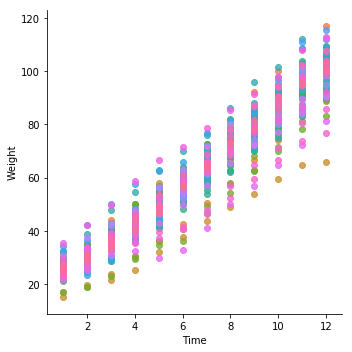

In [58]:
import seaborn as sns
sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False)

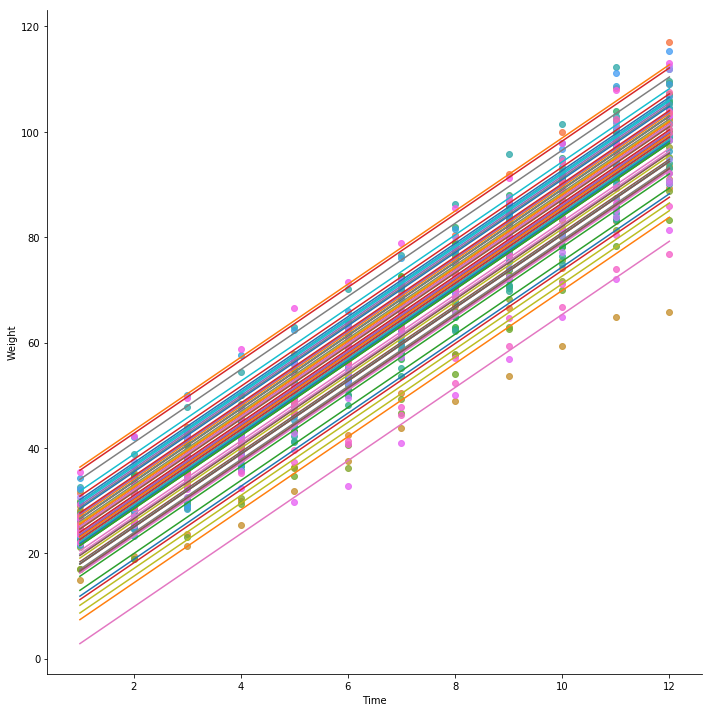

In [65]:
#Add the random intercept for each
import matplotlib.pyplot as plt

sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False, size=10)


for i in range(0, len(intercept_each_subj)):
    intercept_s=intercept_each_subj[i]
    start_l = data['Time'].min()
    end_l = data['Time'].max()
    plt.plot([start_l, end_l], [slope*start_l + intercept_s, slope*end_l + intercept_s])



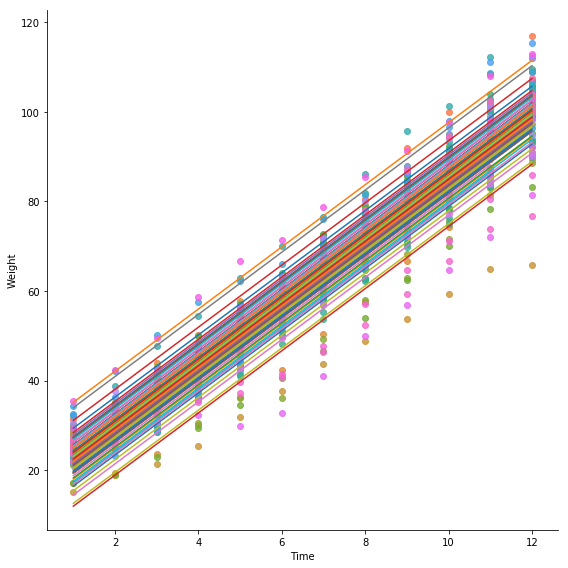

In [102]:

def plot_rand_int(data, x, y, hue, random_intercepts, slope):
    
    sns.lmplot(x, y, data,  hue=hue, fit_reg=False, legend=False, size=8)
    
    for i, ind in enumerate(list(data[hue].unique())):
        intercept_s=random_intercepts[i]
        #slope_s=random_intercepts[i]
        start_l = data.loc[data[hue]==ind, x].min()
        end_l = data.loc[data[hue]==ind, x].max()
        plt.plot([start_l, end_l], [slope*start_l + intercept_s, slope*end_l + intercept_s])


        
        
#Example
plot_rand_int(data=data, x='Time', y='Weight', hue='Pig', random_intercepts = intercept_each_subj, slope=slope)

In [103]:
#Add the random slope
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()
print(mdf.summary())

C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.7891    
Min. group size:   11       Likelihood:          -2220.3890
Max. group size:   12       Converged:           No        
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.438 0.000 14.423 17.055
Time              6.939    0.085 81.326 0.000  6.772  7.106
Group Var        30.266    4.271                           
Group x Time Cov  0.746    0.304                           
Time Var          0.483    0.046                           



C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


In [104]:

intercept_add_each= array([ round(mdf.random_effects.values()[i][0], 2) for i in range(0, len(mdf.random_effects.values()))])
slope_add_each= array([ round(mdf.random_effects.values()[i][1], 2) for i in range(0, len(mdf.random_effects.values()))])

# intercept_add_each is what you add to each intercept, so the mean must be 0
print(mean(intercept_add_each))
print(mean(slope_add_each))

intercept_each_subj =  intercept_add_each + mdf.params.Intercept
slope_each_subj =  slope_add_each + mdf.params.Time


-0.0005555555555555437
-0.0001388888888888921


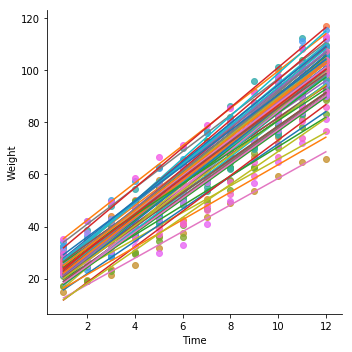

In [105]:
sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False, size=5)


for i in range(0, len(intercept_each_subj)):
    intercept_s=intercept_each_subj[i]
    slope_s=slope_each_subj[i]
    start_l = data['Time'].min()
    end_l = data['Time'].max()
    plt.plot([start_l, end_l], [slope_s*start_l + intercept_s, slope_s*end_l + intercept_s])


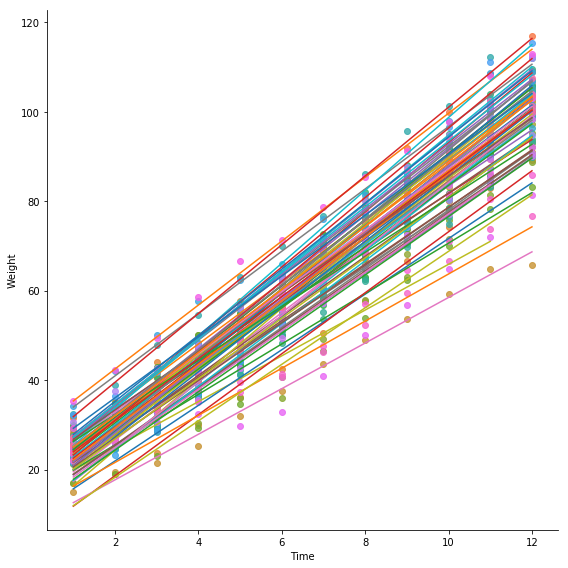

In [106]:
#### As a function

def plot_rand_slope(data, x, y, hue, random_intercepts, random_slopes):
    
    sns.lmplot(x, y, data,  hue=hue, fit_reg=False, legend=False, size=8)
    
    for i, ind in enumerate(list(data[hue].unique())):
        intercept_s=random_intercepts[i]
        slope_s=random_slopes[i]
        start_l = data.loc[data[hue]==ind, x].min()
        end_l = data.loc[data[hue]==ind, x].max()
        plt.plot([start_l, end_l], [slope_s*start_l + intercept_s, slope_s*end_l + intercept_s])


        
        
#Example
plot_rand_slope(data=data, x='Time', y='Weight', hue='Pig', random_intercepts = intercept_each_subj, random_slopes=slope_each_subj)

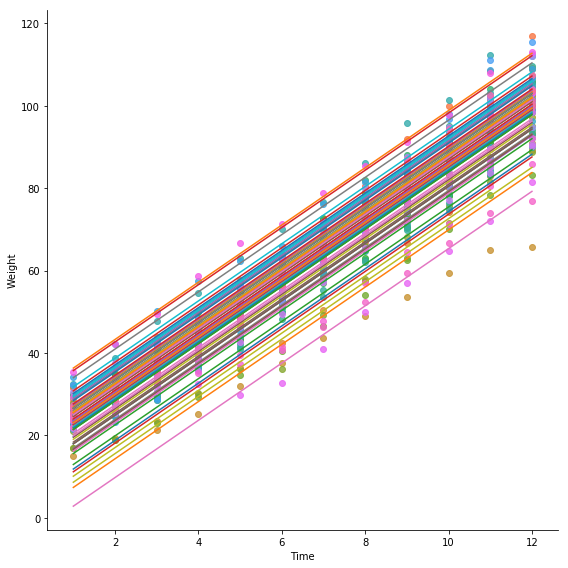

In [107]:
## Example random intercept

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~1")
mdf = md.fit()

intercept_add_each= array([ round(mdf.random_effects.values()[i][0], 2) for i in range(0, len(mdf.random_effects.values()))])
slope = mdf.params.Time

I_s =  intercept_add_each + mdf.params.Intercept

plot_rand_int(data,'Time','Weight','Pig', I_s, slope)





C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

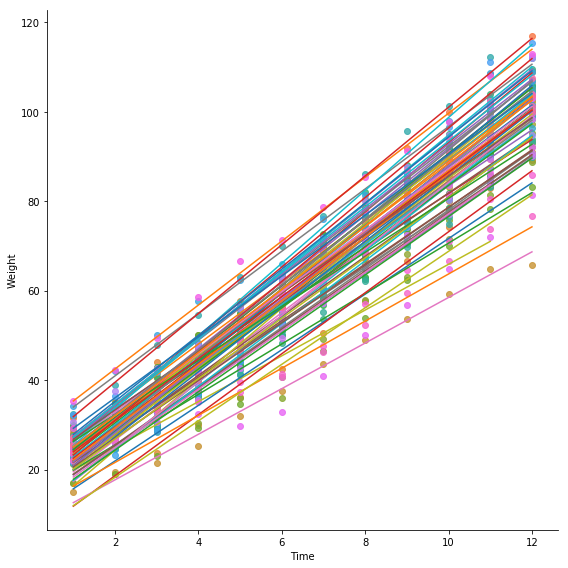

In [108]:

## Example random slope

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()

intercept_add_each= array([ round(mdf.random_effects.values()[i][0], 2) for i in range(0, len(mdf.random_effects.values()))])
slope_add_each= array([ round(mdf.random_effects.values()[i][1], 2) for i in range(0, len(mdf.random_effects.values()))])

I_s =  intercept_add_each + mdf.params.Intercept
S_s =  slope_add_each + mdf.params.Time

plot_rand_slope(data,'Time','Weight','Pig', I_s, S_s)